# All cut fiber data for correction

In [26]:
import numpy as np
import pandas as pd #this might need to be installed
import datetime
import matplotlib.pyplot as plt
import statistics as sts
from scipy.optimize import minimize,least_squares
from sympy import symbols, diff
from sympy.functions import exp
from iminuit import Minuit
#import ROOT
from fibertest_fncts import frdmunits,unpack_data,unpack_and_throw_outliers

x0=(1.5+2.75)*2.54 #cm/inch
Len=207.6#(4+73.5)*2.54+x0 #cm/inch
L_err=0.125*frdmunits
pos=np.transpose(np.array(pd.read_csv("fibertest_002150.csv")))[0]*frdmunits+x0
pos_zero=np.concatenate((pos, [0.]))

#Fibers 
cut="fibertest_002150.csv"
refurb="fibertest_002151.csv"


In [27]:
(1.5+2.75)*2.54

10.795

In [28]:

cut_fiber2_pmt_data=np.transpose(np.transpose(np.array(pd.read_csv(cut)))[2:-104])
cut_fiber2_sipm_data=np.transpose(np.transpose(np.array(pd.read_csv(cut)))[-104:-4])
cut_fiber2_pmt_means=np.transpose(np.transpose(np.array(pd.read_csv(cut)))[-4])
cut_fiber2_pmt_std=np.transpose(np.transpose(np.array(pd.read_csv(cut)))[-3])
cut_fiber2_sipm_means=np.transpose(np.transpose(np.array(pd.read_csv(cut)))[-2])
cut_fiber2_sipm_std=np.transpose(np.transpose(np.array(pd.read_csv(cut)))[-1])

refurb_fiber2_pmt_data=np.transpose(np.transpose(np.array(pd.read_csv(refurb)))[2:-104])
refurb_fiber2_sipm_data=np.transpose(np.transpose(np.array(pd.read_csv(refurb)))[-104:-4])
refurb_fiber2_pmt_means=np.transpose(np.transpose(np.array(pd.read_csv(refurb)))[-4])
refurb_fiber2_pmt_std=np.transpose(np.transpose(np.array(pd.read_csv(refurb)))[-3])
refurb_fiber2_sipm_means=np.transpose(np.transpose(np.array(pd.read_csv(refurb)))[-2])
refurb_fiber2_sipm_std=np.transpose(np.transpose(np.array(pd.read_csv(refurb)))[-1])

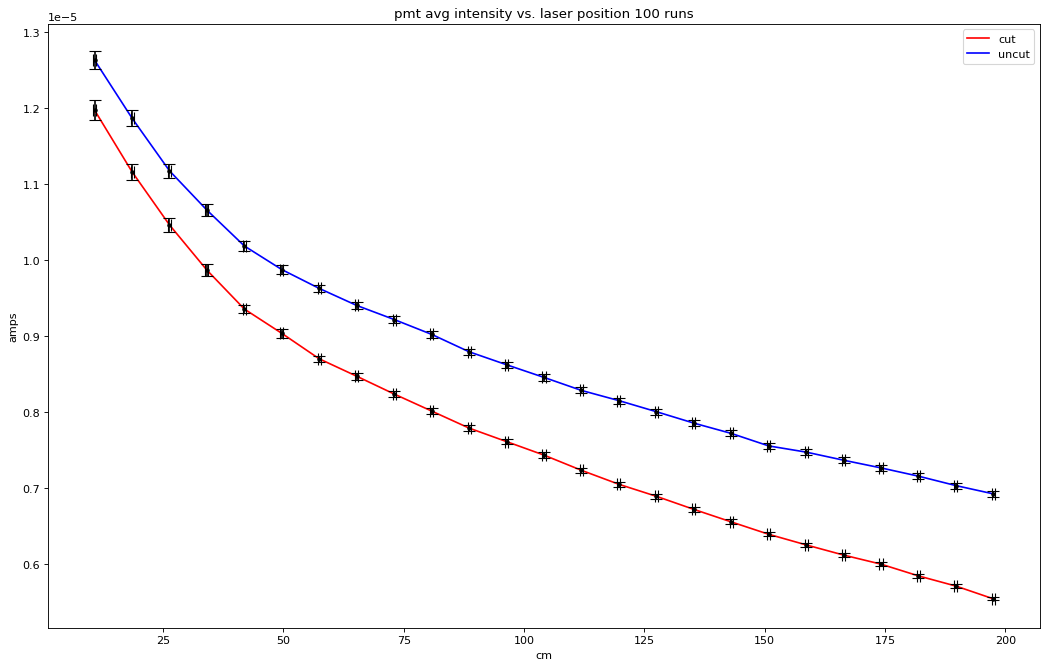

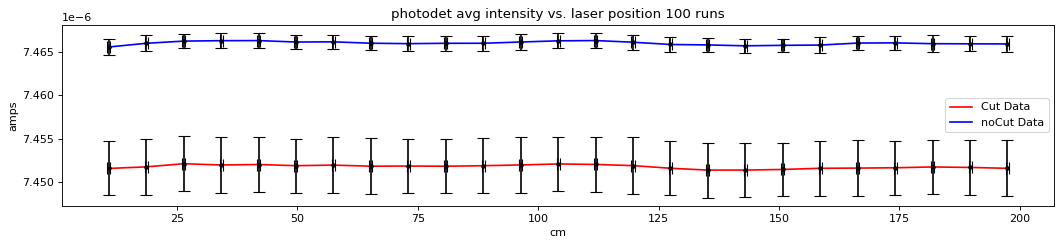

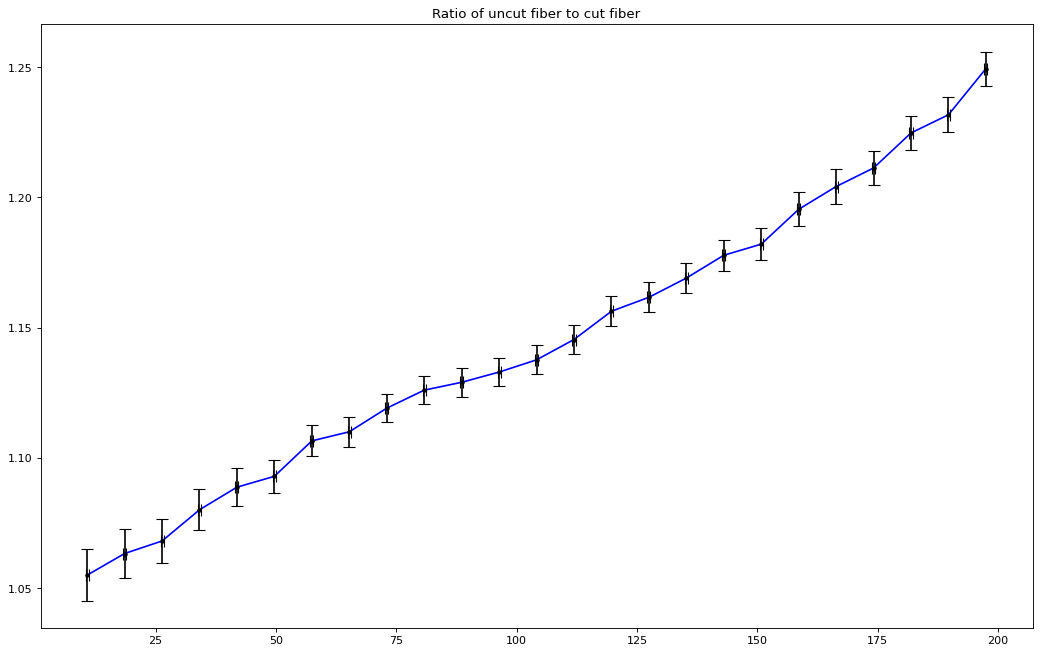

In [29]:
#a_scale_factor=np.mean(refurb_fiber2_sipm_means)/np.mean(fiber2_sipm_means)
fig = plt.figure(figsize=(16, 10), dpi=80)
plt.plot(pos,-cut_fiber2_pmt_means,color='r')
plt.errorbar(pos,-cut_fiber2_pmt_means, xerr=L_err,yerr=cut_fiber2_pmt_std, fmt=".", color="k",capsize=5)
plt.plot(pos,-refurb_fiber2_pmt_means,color='b')
plt.errorbar(pos,-refurb_fiber2_pmt_means, xerr=L_err, yerr=refurb_fiber2_pmt_std, fmt=".", color="k",capsize=5)
plt.title("pmt avg intensity vs. laser position 100 runs")
plt.xlabel("cm")
plt.ylabel("amps")
plt.legend(['cut', 'uncut'])
plt.show()
fig = plt.figure(figsize=(16, 3), dpi=80)
plt.plot(pos,cut_fiber2_sipm_means,color='r')
plt.errorbar(pos,cut_fiber2_sipm_means, xerr=L_err,yerr=cut_fiber2_sipm_std, fmt=".", color="k",capsize=5)
plt.plot(pos,refurb_fiber2_sipm_means,color='b')
plt.errorbar(pos,refurb_fiber2_sipm_means, xerr=L_err,yerr=refurb_fiber2_sipm_std, fmt=".", color="k",capsize=5)
plt.title("photodet avg intensity vs. laser position 100 runs")
plt.xlabel("cm")
plt.ylabel("amps")
plt.legend(['Cut Data', 'noCut Data'])
plt.show()

fig = plt.figure(figsize=(16, 10), dpi=80)
plt.plot(pos,refurb_fiber2_pmt_means/cut_fiber2_pmt_means,color='b')
plt.errorbar(pos,refurb_fiber2_pmt_means/cut_fiber2_pmt_means, xerr=L_err, yerr=refurb_fiber2_pmt_std/cut_fiber2_pmt_means, fmt=".", color="k",capsize=5)
plt.title("Ratio of uncut fiber to cut fiber")
plt.show()

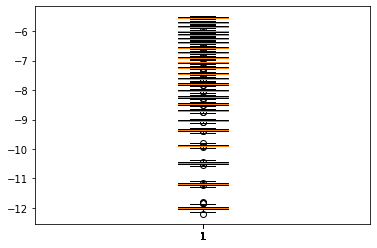

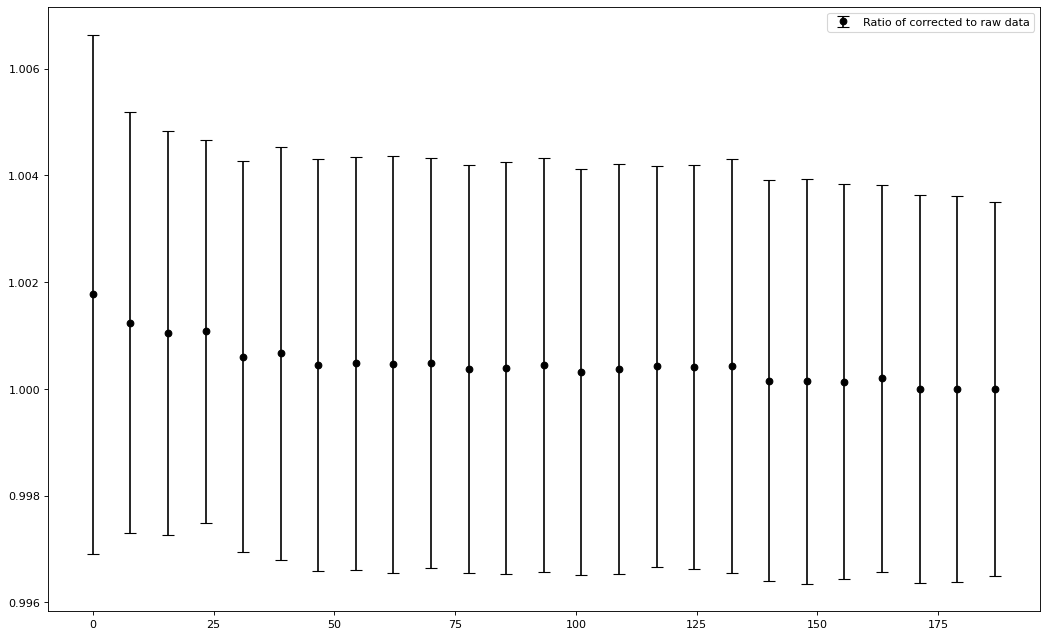

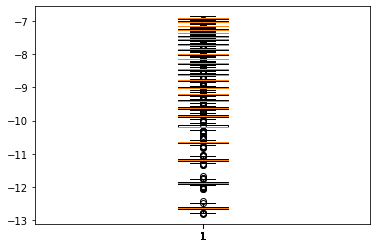

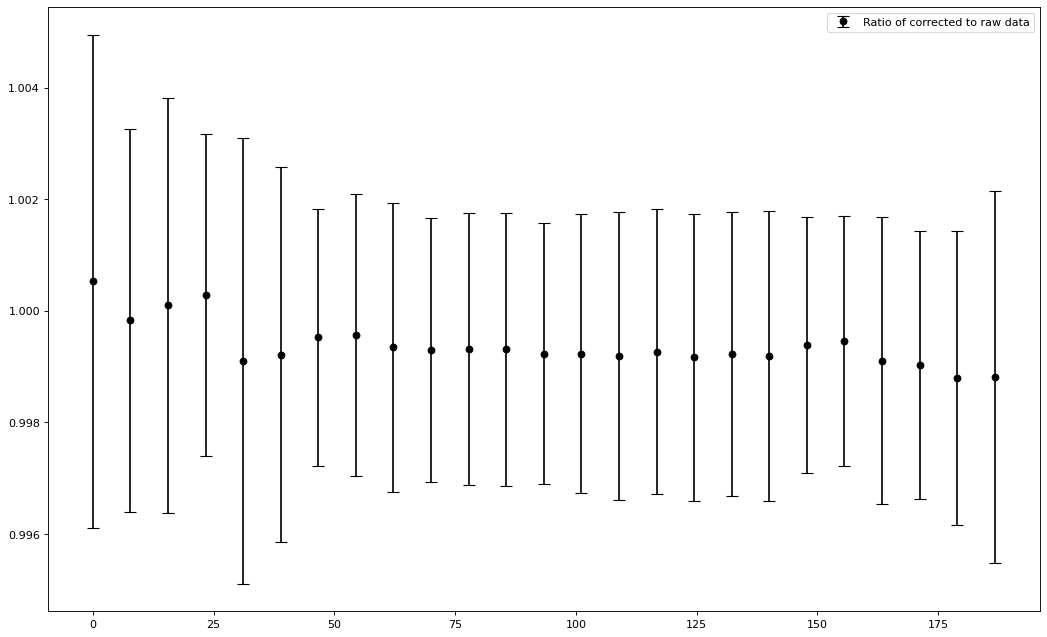

In [30]:
cut_pmt_data_no_outliers,cut_det_data_no_outliers,cut_pmt_data_no_outliers_means, cut_pmt_data_no_outliers_std=unpack_and_throw_outliers(cut,100)
pmt_data_no_outliers,det_data_no_outliers,pmt_data_no_outliers_means, pmt_data_no_outliers_std=unpack_and_throw_outliers(refurb,100)

In [31]:
det_data_no_outliers_means=np.empty(25)
det_data_no_outliers_std=np.empty(25)
cut_det_data_no_outliers_means=np.empty(25)
cut_det_data_no_outliers_std=np.empty(25)

for i in range(25):
    det_data_no_outliers_means[i]=np.mean(det_data_no_outliers[i])
    det_data_no_outliers_std[i]=np.std(det_data_no_outliers[i])
    cut_det_data_no_outliers_means[i]=np.mean(cut_det_data_no_outliers[i])
    cut_det_data_no_outliers_std[i]=np.std(cut_det_data_no_outliers[i])
    

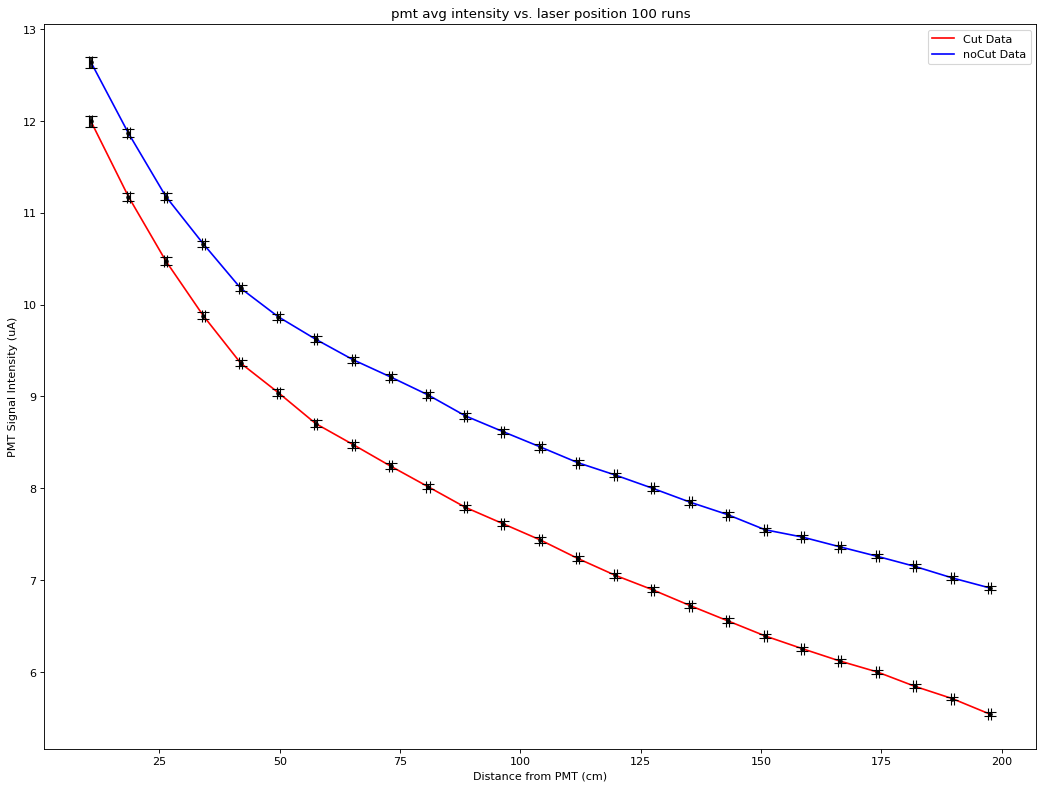

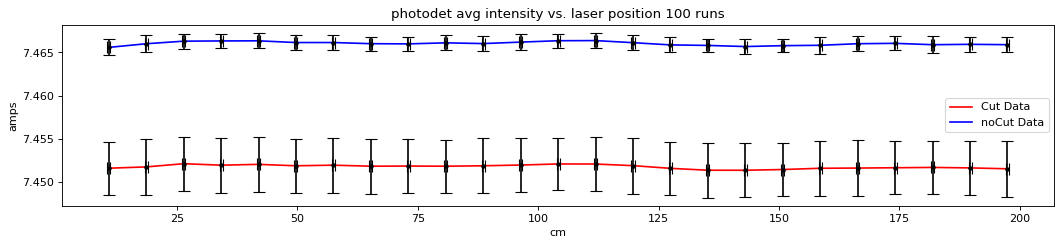

No handles with labels found to put in legend.


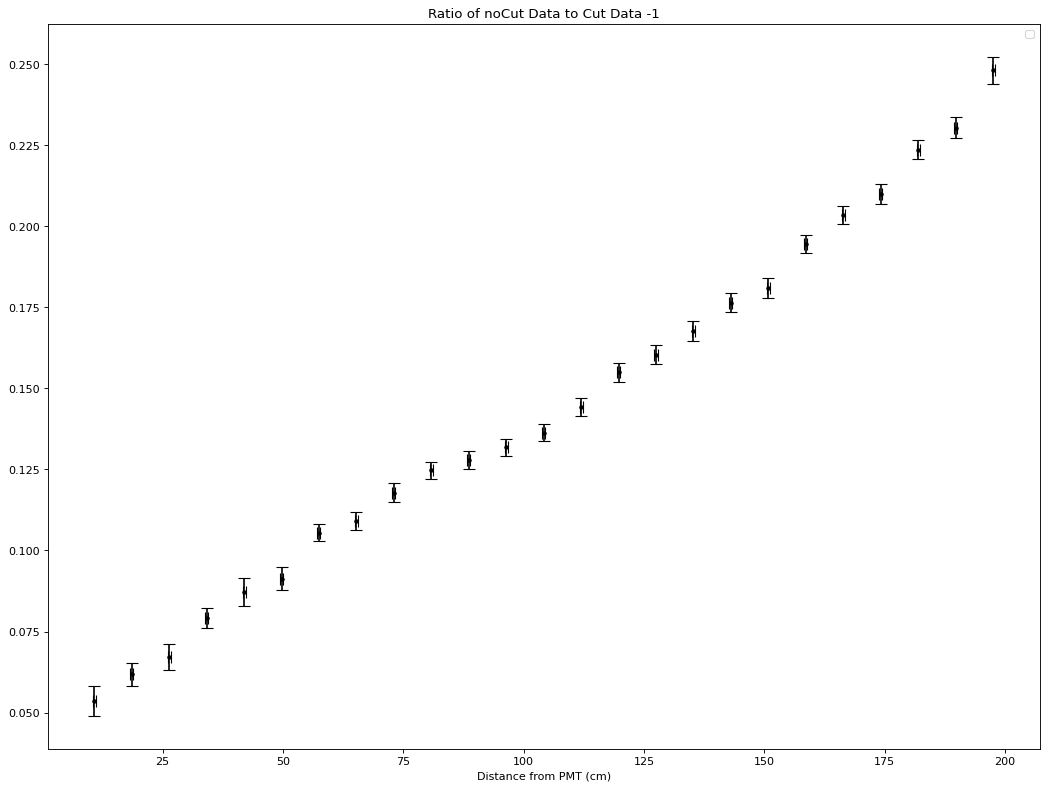

In [32]:
#a_scale_factor=np.mean(refurb_fiber2_sipm_means)/np.mean(fiber2_sipm_means)
fig = plt.figure(figsize=(16, 12), dpi=80)
plt.plot(pos,cut_pmt_data_no_outliers_means,color='r')
plt.errorbar(pos,cut_pmt_data_no_outliers_means, xerr=L_err,yerr=cut_pmt_data_no_outliers_std, fmt=".", color="k",capsize=5)
plt.plot(pos,pmt_data_no_outliers_means,color='b')
plt.errorbar(pos,pmt_data_no_outliers_means, xerr=L_err, yerr=cut_pmt_data_no_outliers_std, fmt=".", color="k",capsize=5)
plt.title("pmt avg intensity vs. laser position 100 runs")
plt.xlabel("Distance from PMT (cm)")
plt.ylabel("PMT Signal Intensity (uA)")
plt.legend(['Cut Data', 'noCut Data'])
plt.show()

fig = plt.figure(figsize=(16, 3), dpi=80)
plt.plot(pos,cut_det_data_no_outliers_means,color='r')
plt.errorbar(pos,cut_det_data_no_outliers_means, xerr=L_err,yerr=cut_det_data_no_outliers_std, fmt=".", color="k",capsize=5)
plt.plot(pos,det_data_no_outliers_means,color='b')
plt.errorbar(pos,det_data_no_outliers_means, xerr=L_err,yerr=det_data_no_outliers_std, fmt=".", color="k",capsize=5)
plt.title("photodet avg intensity vs. laser position 100 runs")
plt.xlabel("cm")
plt.ylabel("amps")
plt.legend(['Cut Data', 'noCut Data'])
plt.show()

fig = plt.figure(figsize=(16, 12), dpi=80)
#plt.plot(pos,np.array(pmt_data_no_outliers_means)/np.array(cut_pmt_data_no_outliers_means)-1,color='b',label='Percent of reflected light')
plt.errorbar(pos,np.array(pmt_data_no_outliers_means)/np.array(cut_pmt_data_no_outliers_means)-1, xerr=L_err, yerr=np.array(pmt_data_no_outliers_std)/np.array(cut_pmt_data_no_outliers_means), fmt=".", color="k",capsize=5)
plt.title("Ratio of noCut Data to Cut Data -1")
plt.legend()
plt.xlabel("Distance from PMT (cm)")
#plt.ylabel("amps")
plt.show()

In [34]:
reflection=np.array(pmt_data_no_outliers_means)/np.array(cut_pmt_data_no_outliers_means)-1
reflection_error=np.array(pmt_data_no_outliers_std)/np.array(cut_pmt_data_no_outliers_means)
def line_res(m,b):
    res=(reflection-(pos*m+b))/reflection_error
    return np.sum(res**2)

In [35]:
line_fit=Minuit(line_res,m=0,b=0)

#no_cut_no_ref.Limit[a]=(0,1)

# Perform the minimization
result = line_fit.migrad()

# Print the result
print("Minimization result: Fiber 2 no cut, no reflection")
print(result)
cov_matrix_line_fit=line_fit.covariance
param_errors=line_fit.errors
corr_matrix = cov_matrix_line_fit / np.outer(param_errors, param_errors)
print(corr_matrix)
print("Optimal parameters:", line_fit.values)
m_fit,b_fit=line_fit.values
m_err,b_err=line_fit.errors


Minimization result: Fiber 2 no cut, no reflection
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 63.47                      │              Nfcn = 38               │
│ EDM = 2.3e-22 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬─

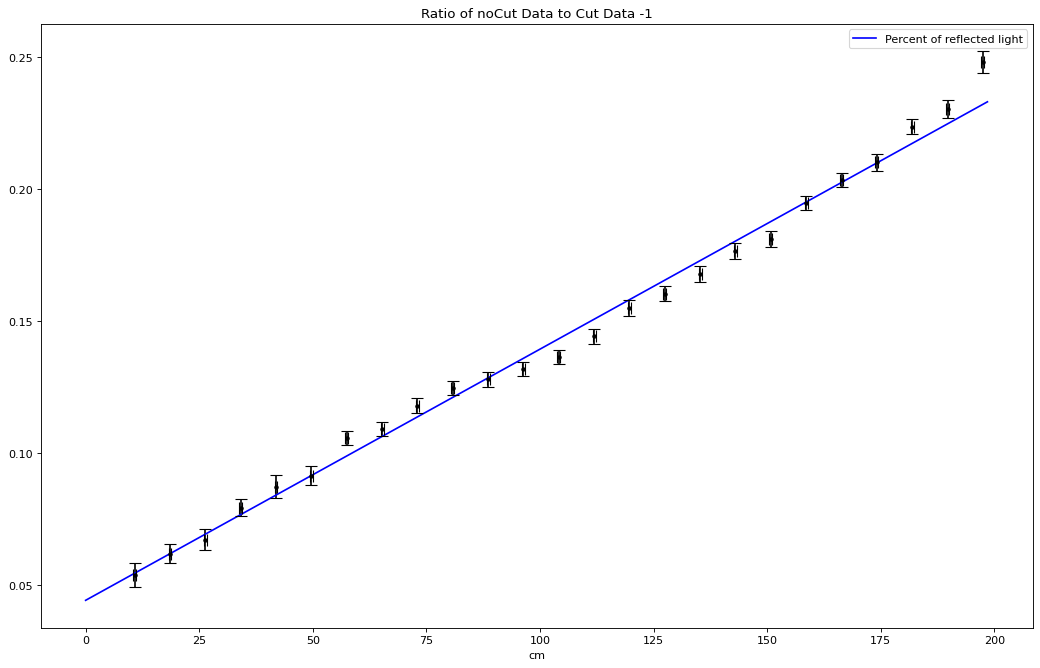

In [10]:
x = np.linspace(0, pos[0] + 1, 1000)
fig = plt.figure(figsize=(16, 10), dpi=80)
plt.plot(x,x*m_fit+b_fit,color='b',label='Percent of reflected light')
plt.errorbar(pos,np.array(pmt_data_no_outliers_means)/np.array(cut_pmt_data_no_outliers_means)-1, xerr=L_err, yerr=np.array(pmt_data_no_outliers_std)/np.array(cut_pmt_data_no_outliers_means), fmt=".", color="k",capsize=5)
plt.title("Ratio of noCut Data to Cut Data -1")
plt.legend()
plt.xlabel("cm")
#plt.ylabel("amps")
plt.show()

# Fitting

### Light Attenuation Functions:

### Reflection ignored $$Q = Q_0 \left[\alpha e^{-\frac{x}{A_L}} + (1-\alpha)e^{-\frac{x}{A_s}}\right]$$

In [11]:
# define attenuation models and residuals to minimize, a is fraction of light carried by long component, A_L is long att length, A_S is short att length
def Attenuation(x, a, A_L, A_S ):
    return (a*np.exp(-(x)/A_L)+np.abs(1-a)*np.exp(-(x)/A_S))
    
def Attenuation_w_Reflection(x, a, b, A_L, A_S, R):
    return Attenuation(x,a,A_L,A_S)+R*(b*np.exp(-(2*L-x)/A_L)+np.abs(1-b)*np.exp(-(2*L-x)/A_S))

def Attenuation_w_Reflection_1P(x,R):
    return R*Attenuation((2*L-x),a_fit_cut,L_fit_cut,S_fit_cut)+(1-R)*Attenuation(x,a_fit_cut,L_fit_cut,S_fit_cut)

def Attenuation_w_Reflection_2P(x,D,R):
    return R*Attenuation((2*L-x),a_fit_cut,L_fit_cut,S_fit_cut)+D*Attenuation(x,a_fit_cut,L_fit_cut,S_fit_cut)

#Define Chi squared and adding parameter Q, as total light to be attentuated
def minimize_no_reflection_uncut(Q,a, A_L, A_S):
    res=(pmt_data_no_outliers_means-Q*Attenuation(pos,a,A_L,A_S))/pmt_data_no_outliers_std
    return np.sum(res**2)

def minimize_with_reflection_uncut(Q,a, b, A_L, A_S):
    res=(fiber2_pmt_means-Q*Attenuation_w_Reflection(pos,a,b,A_L,A_S,1))/fiber2_pmt_std
    return np.sum(res**2)

def minimize_with_reflection_uncut_1p(Q,R):
    res=(fiber2_pmt_means-Q*Attenuation_w_Reflection_1P(pos,R))/fiber2_pmt_std
    return np.sum(res**2)
    
def minimize_with_reflection_uncut_2p(Q,D,R):
    res=(fiber2_pmt_means-Q*Attenuation_w_Reflection_2P(pos,D,R))/fiber2_pmt_std
    return np.sum(res**2)
    
def minimize_no_reflection_cut(Q,a, A_L, A_S):
    res=(cut_pmt_data_no_outliers_means-Q*Attenuation(pos,a,A_L,A_S))/cut_pmt_data_no_outliers_std
    return np.sum(res**2)
    
def minimize_no_reflection_cut_no_firstp(Q,a,A_L,A_S):
    means,std=y_data(Q)
    res=(means-Q*Attenuation(pos_zero,a,A_L,A_S))/std
    return np.sum(res**2)

def joint_minimization(Q,a,A_L,A_S,D,R):
    data=np.concatenate([cut_pmt_data_no_outliers_means,pmt_data_no_outliers_means])
    model=Q*np.concatenate([Attenuation(pos,a,A_L,A_S),(D*Attenuation(pos,a,A_L,A_S)+R*Attenuation(2*Len-pos,a,A_L,A_S))])
    err=np.concatenate([cut_pmt_data_no_outliers_std,pmt_data_no_outliers_std])
    cost=(data-model)/err
    return np.sum(cost**2)

def joint_minimization_2(Q,a,A_L,A_S,D,R):
    cost1=(cut_pmt_data_no_outliers_means-Q*Attenuation(pos,a,A_L,A_S))/cut_pmt_data_no_outliers_std
    cost2=(pmt_data_no_outliers_means-Q*(D*Attenuation(pos,a,A_L,A_S)+R*Attenuation(2*Len-pos,a,A_L,A_S)))/pmt_data_no_outliers_std
    return np.sum(cost1**2+cost2**2)

def joint_minimization_D_only(Q,a,A_L,A_S,D):
    cost1=(cut_pmt_data_no_outliers_means-Q*Attenuation(pos,a,A_L,A_S))/cut_pmt_data_no_outliers_std
    cost2=(pmt_data_no_outliers_means-Q*(D*Attenuation(pos,a,A_L,A_S)+(1-D)*Attenuation((2*Len-pos),a,A_L,A_S)))/pmt_data_no_outliers_std
    return np.sum(cost1**2+cost2**2)

In [12]:
symbols("Q")

Q

In [13]:
def grad(f,var_strlist,val_list,x_val):
    """finds Jacobian for fit_data
       inputs: f, function
               var_list: list of variable symbols as strings, length N
               val_list: list of values (one for each variable) which the gradient is to be evaluated at, length N
               x_val: x value at which the gradient is to be evaluated, float
       returns: list of gradient w.r.t. variables in var_list at the point x=x_val, length N
       """
    f_string=str(f).replace('np.', '')
    symbol_string=''
    for i in range(len(var_strlist)):
        if i==len(var_strlist)-1:
            symbol_string=symbol_string+var_strlist[i]+' x'
        else:
            symbol_string=symbol_string+var_strlist[i]+' '
    ##########horrible line in which you need to input the variables (sorry)##########
    Q_fit_uncut, a_fit_uncut,L_fit_uncut,S_fit_uncut,x=symbols(symbol_string, real=True)
    var_list=[Q_fit_uncut, a_fit_uncut,L_fit_uncut,S_fit_uncut]

    f_no_np=eval(f_string)
    var_gradient=[]
    for var in var_list:
        partial=diff(f_no_np,var)
        partial_string=str(partial)
        partial_string_nums=partial_string
        #put in values for variables from val_list
        for i in range(len(var_list)):
            partial_string_nums=partial_string_nums.replace(str(var_list[i]),'('+str(var_list[i])+')').replace('('+str(var_list[i])+')',str(val_list[i]))
        #put in value for x from x_val
        x_locs=[]
        for i in range(len(partial_string_nums)):
            if partial_string_nums[i]=='x' and partial_string_nums[i-1]!='e':
                x_locs.append(i)
        x_locs.reverse()
        partial_string_val=partial_string_nums
        for x_loc in x_locs:
            partial_string_val=partial_string_val[0:x_loc]+str(x_val)+partial_string_val[x_loc+1:]
        partial_string_val_np=partial_string_val.replace('exp','np.exp')
        partial_val=eval(partial_string_val_np)
        var_gradient.append(partial_val)
    var_gradient = np.array(var_gradient)

    return var_gradient
def grad_cut(f,var_strlist,val_list,x_val):
    """finds Jacobian for fit_data
       inputs: f, function
               var_list: list of variable symbols as strings, length N
               val_list: list of values (one for each variable) which the gradient is to be evaluated at, length N
               x_val: x value at which the gradient is to be evaluated, float
       returns: list of gradient w.r.t. variables in var_list at the point x=x_val, length N
       """
    f_string=str(f).replace('np.', '')
    symbol_string=''
    for i in range(len(var_strlist)):
        if i==len(var_strlist)-1:
            symbol_string=symbol_string+var_strlist[i]+' x'
        else:
            symbol_string=symbol_string+var_strlist[i]+' '
    ##########horrible line in which you need to input the variables (sorry)##########
    Q_fit_cut, a_fit_cut,L_fit_cut,S_fit_cut,x=symbols(symbol_string, real=True)
    var_list=[Q_fit_cut, a_fit_cut,L_fit_cut,S_fit_cut]

    f_no_np=eval(f_string)
    var_gradient=[]
    for var in var_list:
        partial=diff(f_no_np,var)
        partial_string=str(partial)
        partial_string_nums=partial_string
        #put in values for variables from val_list
        for i in range(len(var_list)):
            partial_string_nums=partial_string_nums.replace(str(var_list[i]),'('+str(var_list[i])+')').replace('('+str(var_list[i])+')',str(val_list[i]))
        #put in value for x from x_val
        x_locs=[]
        for i in range(len(partial_string_nums)):
            if partial_string_nums[i]=='x' and partial_string_nums[i-1]!='e':
                x_locs.append(i)
        x_locs.reverse()
        partial_string_val=partial_string_nums
        for x_loc in x_locs:
            partial_string_val=partial_string_val[0:x_loc]+str(x_val)+partial_string_val[x_loc+1:]
        partial_string_val_np=partial_string_val.replace('exp','np.exp')
        partial_val=eval(partial_string_val_np)
        var_gradient.append(partial_val)
    var_gradient = np.array(var_gradient)

    return var_gradient
def grad_w_ref_nocut(f,var_strlist,val_list,x_val):
    """finds Jacobian for fit_data
       inputs: f, function
               var_list: list of variable symbols as strings, length N
               val_list: list of values (one for each variable) which the gradient is to be evaluated at, length N
               x_val: x value at which the gradient is to be evaluated, float
       returns: list of gradient w.r.t. variables in var_list at the point x=x_val, length N
       """
    f_string=str(f).replace('np.', '')
    symbol_string=''
    for i in range(len(var_strlist)):
        if i==len(var_strlist)-1:
            symbol_string=symbol_string+var_strlist[i]+' x'
        else:
            symbol_string=symbol_string+var_strlist[i]+' '
    ##########horrible line in which you need to input the variables (sorry)##########
    Q_fit_j, a_fit_j,L_fit_j,S_fit_j,D_fit,R_fit,x=symbols(symbol_string, real=True)
    var_list=[Q_fit_j, a_fit_j,L_fit_j,S_fit_j,D_fit,R_fit]

    f_no_np=eval(f_string)
    var_gradient=[]
    for var in var_list:
        partial=diff(f_no_np,var)
        partial_string=str(partial)
        partial_string_nums=partial_string
        #put in values for variables from val_list
        for i in range(len(var_list)):
            partial_string_nums=partial_string_nums.replace(str(var_list[i]),'('+str(var_list[i])+')').replace('('+str(var_list[i])+')',str(val_list[i]))
        #put in value for x from x_val
        x_locs=[]
        for i in range(len(partial_string_nums)):
            if partial_string_nums[i]=='x' and partial_string_nums[i-1]!='e':
                x_locs.append(i)
        x_locs.reverse()
        partial_string_val=partial_string_nums
        for x_loc in x_locs:
            partial_string_val=partial_string_val[0:x_loc]+str(x_val)+partial_string_val[x_loc+1:]
        partial_string_val_np=partial_string_val.replace('exp','np.exp')
        partial_val=eval(partial_string_val_np)
        var_gradient.append(partial_val)
    var_gradient = np.array(var_gradient)

    return var_gradient
def grad_w_ref_cut(f,var_strlist,val_list,x_val):
    """finds Jacobian for fit_data
       inputs: f, function
               var_list: list of variable symbols as strings, length N
               val_list: list of values (one for each variable) which the gradient is to be evaluated at, length N
               x_val: x value at which the gradient is to be evaluated, float
       returns: list of gradient w.r.t. variables in var_list at the point x=x_val, length N
       """
    f_string=str(f).replace('np.', '')
    symbol_string=''
    for i in range(len(var_strlist)):
        if i==len(var_strlist)-1:
            symbol_string=symbol_string+var_strlist[i]+' x'
        else:
            symbol_string=symbol_string+var_strlist[i]+' '
    ##########horrible line in which you need to input the variables (sorry)##########
    Q_fit_j, a_fit_j,L_fit_j,S_fit_j,x=symbols(symbol_string, real=True)
    var_list=[Q_fit_j, a_fit_j,L_fit_j,S_fit_j]

    f_no_np=eval(f_string)
    var_gradient=[]
    for var in var_list:
        partial=diff(f_no_np,var)
        partial_string=str(partial)
        partial_string_nums=partial_string
        #put in values for variables from val_list
        for i in range(len(var_list)):
            partial_string_nums=partial_string_nums.replace(str(var_list[i]),'('+str(var_list[i])+')').replace('('+str(var_list[i])+')',str(val_list[i]))
        #put in value for x from x_val
        x_locs=[]
        for i in range(len(partial_string_nums)):
            if partial_string_nums[i]=='x' and partial_string_nums[i-1]!='e':
                x_locs.append(i)
        x_locs.reverse()
        partial_string_val=partial_string_nums
        for x_loc in x_locs:
            partial_string_val=partial_string_val[0:x_loc]+str(x_val)+partial_string_val[x_loc+1:]
        partial_string_val_np=partial_string_val.replace('exp','np.exp')
        partial_val=eval(partial_string_val_np)
        var_gradient.append(partial_val)
    var_gradient = np.array(var_gradient)

    return var_gradient

# Minimization with Minuit

In [14]:
from iminuit import Minuit

### $\chi^2=\Sigma\frac{(LightData-AttenuationModel)^2}{\sigma^2}$

## No cut, No Reflection

In [15]:
# Create a Minuit object
no_cut_no_ref = Minuit(minimize_no_reflection_uncut, Q=13, a=.79, A_L=300, A_S=36)

#no_cut_no_ref.Limit[a]=(0,1)

# Perform the minimization
result = no_cut_no_ref.migrad()

# Print the result
print("Minimization result: Fiber 2 no cut, no reflection")
print(result)
cov_matrix_no_cut_no_ref=no_cut_no_ref.covariance
param_errors=no_cut_no_ref.errors
corr_matrix = cov_matrix_no_cut_no_ref / np.outer(param_errors, param_errors)
print(corr_matrix)
print("Optimal parameters:", no_cut_no_ref.values)
print("Parameters Errors:", no_cut_no_ref.errors)
Q_fit_uncut, a_fit_uncut,L_fit_uncut,S_fit_uncut=no_cut_no_ref.values
Q_err_uncut, a_err_uncut,L_err_uncut,S_err_uncut=no_cut_no_ref.errors

Minimization result: Fiber 2 no cut, no reflection
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 42.86                      │              Nfcn = 363              │
│ EDM = 8.99e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬─

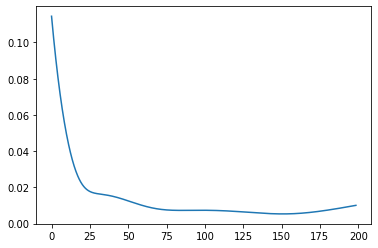

In [16]:
x = np.linspace(0, pos[0] + 1, 1000)
exp_ref_no_y0_line_error = []
for x_pt in x:
    gradV = grad("Q_fit_uncut*((a_fit_uncut*np.exp(-x/L_fit_uncut)+(1-a_fit_uncut)*np.exp(-x/S_fit_uncut)))",["Q_fit_uncut", "a_fit_uncut","L_fit_uncut","S_fit_uncut"],no_cut_no_ref.values,x_pt)
    exp_ref_no_y0_line_error.append(np.sqrt(np.matmul(np.matmul(gradV,cov_matrix_no_cut_no_ref), gradV)))
plt.plot(x,exp_ref_no_y0_line_error)

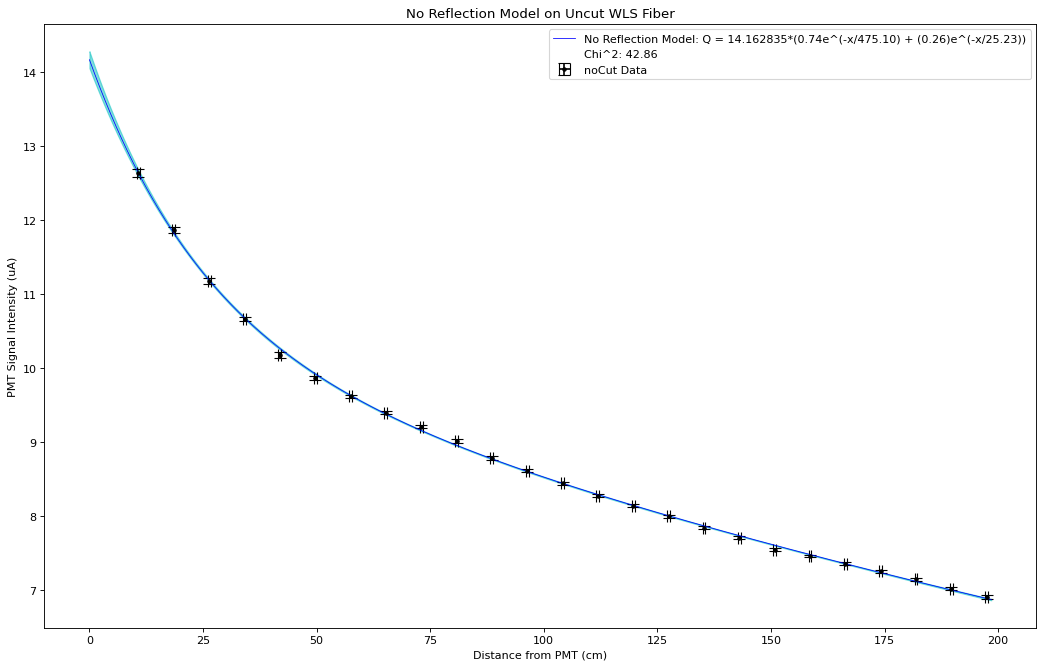

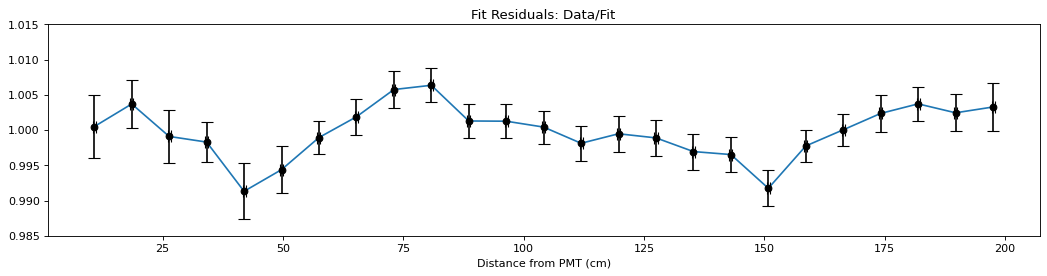

In [17]:
fit_nocut=Q_fit_uncut*Attenuation(pos_zero,a_fit_uncut,L_fit_uncut,S_fit_uncut)
fit_fine_nocut=Q_fit_uncut*Attenuation(x,a_fit_uncut,L_fit_uncut,S_fit_uncut)
fig = plt.figure(figsize=(16, 10), dpi=80)
err = (pmt_data_no_outliers_std)

plt.errorbar(pos,pmt_data_no_outliers_means, xerr=L_err,yerr=err, fmt=".", color="k",capsize=5,label='noCut Data')
plt.plot(x, fit_fine_nocut, label=f'No Reflection Model: Q = {Q_fit_uncut:2f}*({a_fit_uncut:.2f}e^(-x/{L_fit_uncut:.2f}) + ({1-a_fit_uncut:.2f})e^(-x/{S_fit_uncut:.2f}))', color='b',linewidth=0.7)
plt.plot([], [], ' ', label=f'Chi^2: {42.86}')
plt.fill_between(x,fit_fine_nocut-exp_ref_no_y0_line_error,fit_fine_nocut+exp_ref_no_y0_line_error,alpha=0.5,zorder=2,color='c')
plt.title("No Reflection Model on Uncut WLS Fiber")#\n Q_0 = %f+/-%f \n alpha = %f+/-%f \n A_L = %f+/-%f \n A_S = %f+/-%f \n" %(Q_fit_uncut, Q_err_uncut,a_fit_uncut, a_err_uncut,L_fit_uncut, L_err_uncut,S_fit_uncut, S_err_uncut ))
plt.legend()#[f'No Reflection Model: Q = {Q_fit_uncut:2f}*({a_fit_uncut:.2f}e^(-x/{L_fit_uncut:.2f}) + ({1-a_fit_uncut:.2f})e^(-x/{S_fit_uncut:.2f}))',"noCut Data"])
plt.xlabel("Distance from PMT (cm)")
plt.ylabel("PMT Signal Intensity (uA)")
plt.show()
fig = plt.figure(figsize=(16, 3.5), dpi=80)
plt.plot(pos,pmt_data_no_outliers_means/fit_nocut[0:25])
plt.errorbar(pos,pmt_data_no_outliers_means/fit_nocut[0:25],xerr=L_err,yerr=pmt_data_no_outliers_std/fit_nocut[0:25], fmt="o", color="k",capsize=5)
plt.ylim(.985, 1.015) 
plt.title("Fit Residuals: Data/Fit")
plt.xlabel("Distance from PMT (cm)")
#plt.ylabel("amps")
plt.show()


# Cut No Reflection

In [18]:
# Create a Minuit object
cut_no_ref = Minuit(minimize_no_reflection_cut, Q=13, a=.79, A_L=300, A_S=36)

#no_cut_no_ref.Limit[a]=(0,1)

# Perform the minimization
result = cut_no_ref.migrad()

# Print the result
print("Minimization result: Fiber 2 cut, no reflection")
print(result)
cov_matrix_cut_no_ref=cut_no_ref.covariance
param_errors=cut_no_ref.errors
corr_matrix = cov_matrix_cut_no_ref / np.outer(param_errors, param_errors)
print(corr_matrix)
print("Optimal parameters:", cut_no_ref.values)
print("Parameters Error:", cut_no_ref.errors)

Q_fit_cut, a_fit_cut,L_fit_cut,S_fit_cut=cut_no_ref.values
Q_err_cut, a_err_cut,L_err_cut,S_err_cut=cut_no_ref.errors

Minimization result: Fiber 2 cut, no reflection
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 15.93                      │              Nfcn = 172              │
│ EDM = 4.28e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────

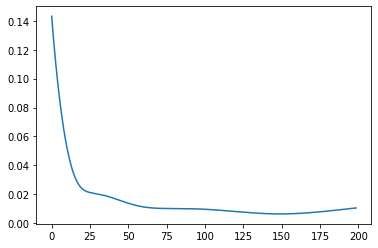

In [19]:
x = np.linspace(0, pos[0] + 1, 1000)
exp_ref_no_y0_line_error = []
for x_pt in x:
    gradV = grad_cut("Q_fit_cut*((a_fit_cut*np.exp(-x/L_fit_cut)+(1-a_fit_cut)*np.exp(-x/S_fit_cut)))",["Q", "a_fit_cut","L_fit_cut","S_fit_cut"],cut_no_ref.values,x_pt)
    exp_ref_no_y0_line_error.append(np.sqrt(np.matmul(np.matmul(gradV,cov_matrix_cut_no_ref), gradV)))
plt.plot(x,exp_ref_no_y0_line_error)

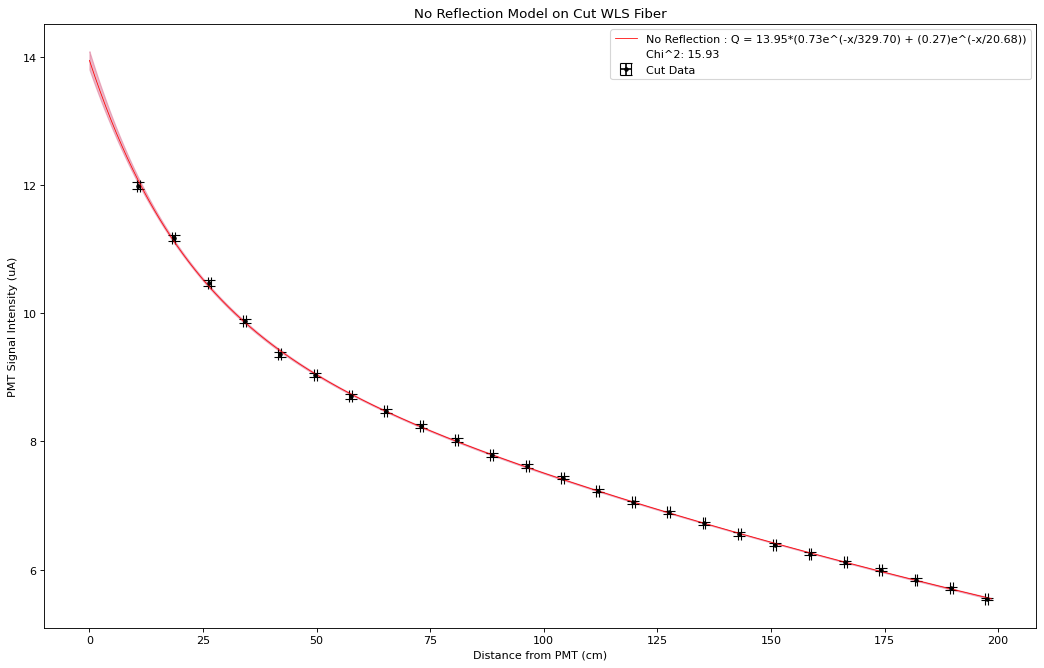

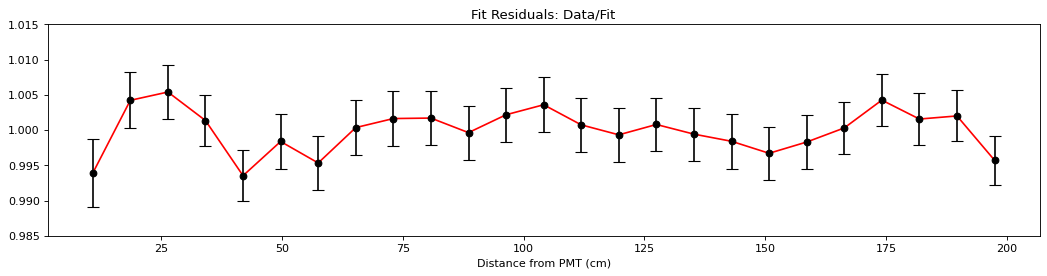

In [20]:
fit_cut=Q_fit_cut*Attenuation(pos_zero,a_fit_cut,L_fit_cut,S_fit_cut)
fit_fine_cut=Q_fit_cut*Attenuation(x,a_fit_cut,L_fit_cut,S_fit_cut)
fig = plt.figure(figsize=(16, 10), dpi=80)
err = (cut_pmt_data_no_outliers_std)
plt.errorbar(pos,cut_pmt_data_no_outliers_means, xerr=L_err,yerr=err, fmt=".", color="k",capsize=5,label='Cut Data')
plt.plot(x, fit_fine_cut, label=f'No Reflection : Q = {Q_fit_cut:.2f}*({a_fit_cut:.2f}e^(-x/{L_fit_cut:.2f}) + ({1-a_fit_cut:.2f})e^(-x/{S_fit_cut:.2f}))',color='r',linewidth=0.7)
plt.plot([], [], ' ', label=f'Chi^2: {15.93}')
plt.fill_between(x,fit_fine_cut-exp_ref_no_y0_line_error,fit_fine_cut+exp_ref_no_y0_line_error,alpha=0.5,zorder=2,color='palevioletred')
plt.legend()
plt.xlabel("Distance from PMT (cm)")
plt.ylabel("PMT Signal Intensity (uA)")
plt.title("No Reflection Model on Cut WLS Fiber")#\n Q_0 = %f+/-%f \n alpha = %f+/-%f \n A_L = %f+/-%f \n A_S = %f+/-%f \n" %(Q_fit_cut, Q_err_cut,a_fit_cut, a_err_cut,L_fit_cut, L_err_cut,S_fit_cut, S_err_cut ))
plt.show()
fig = plt.figure(figsize=(16, 3.5), dpi=80)
plt.plot(pos,cut_pmt_data_no_outliers_means/fit_cut[0:25],color='r')
plt.errorbar(pos,cut_pmt_data_no_outliers_means/fit_cut[0:25],yerr=cut_pmt_data_no_outliers_std/fit_cut[0:25], fmt="o", color="k",capsize=5)
plt.ylim(.985, 1.015) 
plt.xlabel("Distance from PMT (cm)")
#plt.ylabel("PMT Signal Intensity (uA)")
plt.title("Fit Residuals: Data/Fit")

#plt.ylabel("u amps")
plt.show()

# Joint Fit

In [21]:
# Create a Minuit object
joint = Minuit(joint_minimization, Q=13, a=.79, A_L=300, A_S=36,D=1,R=1)

# Set limits
#joint.limits["Q"]=[0,20]
#joint.limits["a","D"]=[0,1]

# Perform the minimization
result = joint.migrad()

# Print the result
print("Minimization result: Fiber 2 no cut, no reflection")
print(result)
cov_matrix_joint=joint.covariance
param_errors=joint.errors
corr_matrix = cov_matrix_joint / np.outer(param_errors, param_errors)
print(corr_matrix)
print("Optimal parameters:", joint.values)
print("Parameter Errors:", joint.errors)
Q_fit_j, a_fit_j,L_fit_j,S_fit_j,D_fit,R_fit=joint.values
Q_err_j, a_err_j,L_err_j,S_err_j,D_err,R_err=joint.errors


Minimization result: Fiber 2 no cut, no reflection
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 51                         │              Nfcn = 390              │
│ EDM = 6.86e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬─

In [22]:
cov_matrix_joint_cut=np.transpose(np.transpose(np.array(cov_matrix_joint))[0:4])[0:4]
cov_matrix_joint_nocut=np.array(cov_matrix_joint)

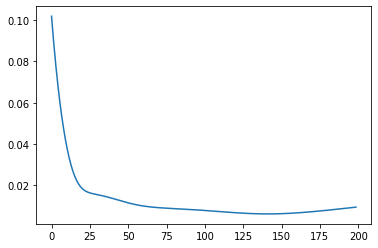

In [23]:
x = np.linspace(0, pos[0] + 1, 1000)
exp_ref_no_y0_line_error_cut = []
exp_ref_no_y0_line_error_nocut = []
for x_pt in x:
    gradV = grad_w_ref_cut("Q_fit_j*((a_fit_j*np.exp(-x/L_fit_j)+(1-a_fit_j)*np.exp(-x/S_fit_j)))",["Q_fit_j", "a_fit_j","L_fit_j","S_fit_j"],joint.values[0:4],x_pt)
    exp_ref_no_y0_line_error_cut.append(np.sqrt(np.matmul(np.matmul(gradV,cov_matrix_joint_cut), gradV)))
    gradV_nocut = grad_w_ref_nocut("Q_fit_j*(D_fit*((a_fit_j*np.exp(-x/L_fit_j)+(1-a_fit_j)*np.exp(-x/S_fit_j)))+R_fit*((a_fit_j*np.exp(-(2*Len-x)/L_fit_j)+(1-a_fit_j)*np.exp(-(2*Len-x)/S_fit_j))))",["Q_fit_j", "a_fit_j","L_fit_j","S_fit_j","D_fit","R_fit"],joint.values,x_pt)
    exp_ref_no_y0_line_error_nocut.append(np.sqrt(np.matmul(np.matmul(gradV_nocut,cov_matrix_joint_nocut), gradV_nocut)))
plt.plot(x,exp_ref_no_y0_line_error_cut)

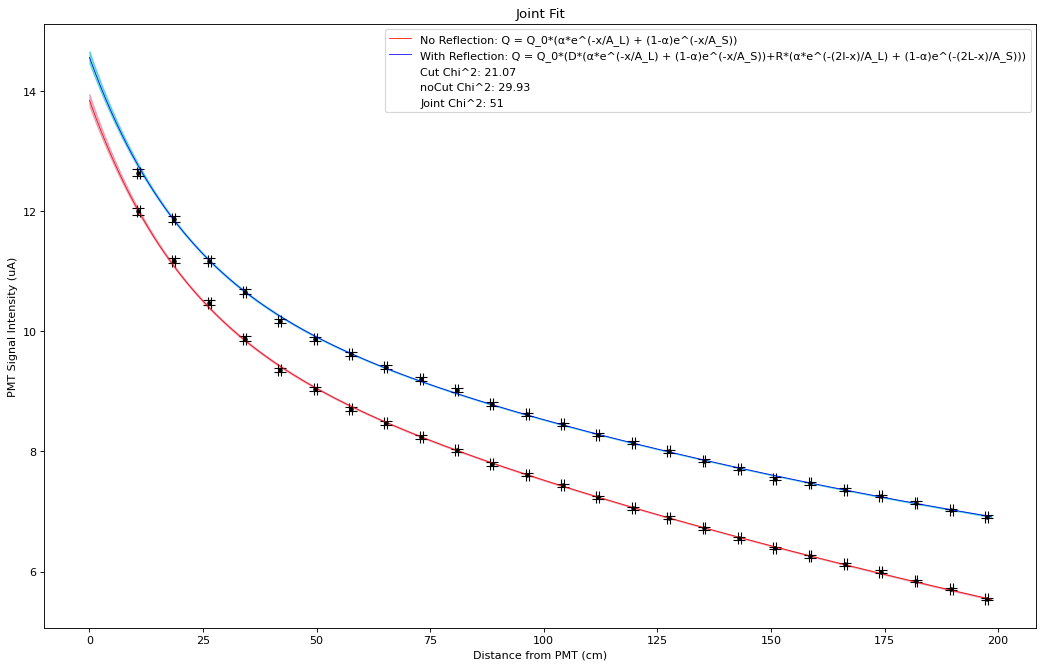

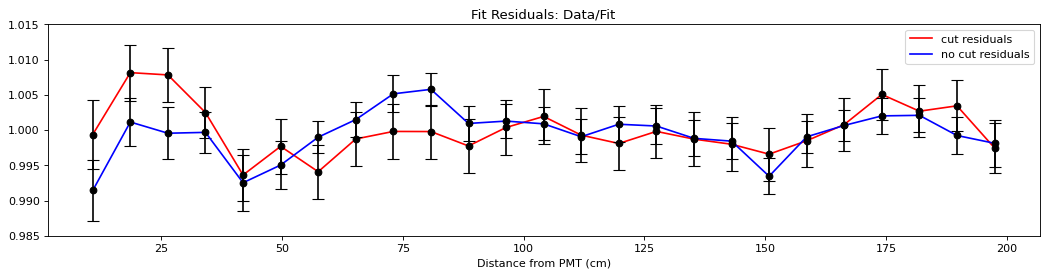

In [24]:

fit_cut_joint=Q_fit_j*Attenuation(pos_zero,a_fit_j,L_fit_j,S_fit_j)
fit_fine_cut_joint=Q_fit_j*Attenuation(x,a_fit_j,L_fit_j,S_fit_j)
fit_uncut_joint=Q_fit_j*(D_fit*Attenuation(pos_zero,a_fit_j,L_fit_j,S_fit_j)+R_fit*Attenuation((2*Len-pos_zero),a_fit_j,L_fit_j,S_fit_j))
fit_fine_uncut_joint=Q_fit_j*(D_fit*Attenuation(x,a_fit_j,L_fit_j,S_fit_j)+R_fit*Attenuation((2*Len-x),a_fit_j,L_fit_j,S_fit_j))

chi_cut=np.sum(((cut_pmt_data_no_outliers_means-fit_cut_joint[0:25])/cut_pmt_data_no_outliers_std)**2)
chi_uncut=np.sum(((pmt_data_no_outliers_means-fit_uncut_joint[0:25])/pmt_data_no_outliers_std)**2)

fig = plt.figure(figsize=(16, 10), dpi=80)
err_nocut = (cut_pmt_data_no_outliers_std)
plt.errorbar(pos,pmt_data_no_outliers_means, xerr=L_err,yerr=err_nocut, fmt=".", color="k",capsize=5)#,label='noCut')
err_cut = (cut_pmt_data_no_outliers_std)

plt.errorbar(pos,cut_pmt_data_no_outliers_means, xerr=L_err,yerr=err_cut, fmt=".", color="k",capsize=5)#,label='Cut')
plt.plot(x, fit_fine_cut_joint, label=f'No Reflection: Q = Q_0*(\u03B1*e^(-x/A_L) + (1-\u03B1)e^(-x/A_S))', color='r',linewidth=0.7)
plt.plot(x, fit_fine_uncut_joint, label=f'With Reflection: Q = Q_0*(D*(\u03B1*e^(-x/A_L) + (1-\u03B1)e^(-x/A_S))+R*(\u03B1*e^(-(2l-x)/A_L) + (1-\u03B1)e^(-(2L-x)/A_S)))', color='b',linewidth=0.7)
plt.plot([], [], ' ', label=f'Cut Chi^2: {chi_cut:.2f}')
plt.plot([], [], ' ', label=f'noCut Chi^2: {chi_uncut:.2f}')
plt.plot([], [], ' ', label=f'Joint Chi^2: {51}')
plt.fill_between(x,fit_fine_cut_joint-exp_ref_no_y0_line_error_cut,fit_fine_cut_joint+exp_ref_no_y0_line_error_cut,alpha=0.5,zorder=2,color='palevioletred')
plt.fill_between(x,fit_fine_uncut_joint-exp_ref_no_y0_line_error_nocut,fit_fine_uncut_joint+exp_ref_no_y0_line_error_nocut,alpha=0.5,zorder=2,color='c')
plt.xlabel("Distance from PMT (cm)")
plt.ylabel("PMT Signal Intensity (uA)")
plt.title("Joint Fit")
plt.legend()
plt.show()
fig = plt.figure(figsize=(16, 3.5), dpi=80)
plt.plot(pos,cut_pmt_data_no_outliers_means/fit_cut_joint[0:25],label="cut residuals",color='red')
plt.errorbar(pos,cut_pmt_data_no_outliers_means/fit_cut_joint[0:25],yerr=cut_pmt_data_no_outliers_std/fit_cut_joint[0:25], fmt="o", color="k",capsize=5)
plt.plot(pos,pmt_data_no_outliers_means/fit_uncut_joint[0:25],label="no cut residuals",color='blue')
plt.errorbar(pos,pmt_data_no_outliers_means/fit_uncut_joint[0:25],yerr=pmt_data_no_outliers_std/fit_uncut_joint[0:25], fmt="o", color="k",capsize=5)
plt.ylim(.985, 1.015) 
plt.title("Fit Residuals: Data/Fit")
plt.xlabel("Distance from PMT (cm)")
#plt.ylabel("PMT Signal Intensity (uA)")
plt.legend()
plt.show()

In [25]:
# Create a Minuit object
joint_D = Minuit(joint_minimization_2, Q=13, a=.79, A_L=300, A_S=36,D=1,R=1)

# Set limits
joint_D.limits["Q"]=[0,20]
joint_D.limits["a","D"]=[0,1]

# Perform the minimization
result = joint_D.migrad()

# Print the result
print("Minimization result: Fiber 2 no cut, no reflection")
print(result)
print("Optimal parameters:", joint_D.values)
Q_fit_j, a_fit_j,L_fit_j,S_fit_j,D_fit,R_fit=joint_D.values

Minimization result: Fiber 2 no cut, no reflection
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 51                         │              Nfcn = 789              │
│ EDM = 4.38e-06 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬─